In [1]:
import pandas as pd
import numpy as np

In [2]:
#download the training data,testing data, subission file  etc, then loan the train data 
dx = pd.read_csv('SUPCOM_Train.csv')

In [3]:
dx.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,44,6210,C,99,0,3707,4,2,2,2,...,16.639203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id17437
1,401,14383,M,22,0,6105,4,2,2,2,...,17.827703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id5086
2,243,11555,M,23,0,5751,4,2,2,2,...,15.473503,25387000.0,0.0,0.0,4571280.0,NaN,NaN,NaN,NaN,train_id1443
3,72,6175,C,99,0,4402,4,2,2,2,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id15469
4,42,1417,M,23,0,6302,4,2,2,2,...,14.286244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id14368


In [4]:
dx.columns

Index(['BCT_CODBUR', 'CTR_MATFIS', 'CTR_CATEGO_X', 'FJU_CODFJU', 'CTR_CESSAT',
       'ACT_CODACT', 'CTR_OBLDIR', 'CTR_OBLACP', 'CTR_OBLRES', 'CTR_OBLFOP',
       ...
       'target', 'FAC_MNTPRI_F', 'FAC_MFODEC_F', 'FAC_MNTDCO_F',
       'FAC_MNTTVA_F', 'FAC_MNTPRI_C', 'FAC_MFODEC_C', 'FAC_MNTDCO_C',
       'FAC_MNTTVA_C', 'id'],
      dtype='object', length=121)

In [5]:
tittles=list(dx.columns)
tittles[1],tittles[111]=tittles[111],tittles[1]
dx=dx[tittles]

In [6]:
dx.columns

Index(['BCT_CODBUR', 'target', 'CTR_CATEGO_X', 'FJU_CODFJU', 'CTR_CESSAT',
       'ACT_CODACT', 'CTR_OBLDIR', 'CTR_OBLACP', 'CTR_OBLRES', 'CTR_OBLFOP',
       ...
       'CTR_MATFIS', 'FAC_MNTPRI_F', 'FAC_MFODEC_F', 'FAC_MNTDCO_F',
       'FAC_MNTTVA_F', 'FAC_MNTPRI_C', 'FAC_MFODEC_C', 'FAC_MNTDCO_C',
       'FAC_MNTTVA_C', 'id'],
      dtype='object', length=121)

In [7]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21295 entries, 0 to 21294
Columns: 121 entries, BCT_CODBUR to id
dtypes: float64(103), int64(16), object(2)
memory usage: 19.7+ MB


In [8]:
dx.describe()

,BCT_CODBUR,target,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,...,RES_ANNIMP,CTR_MATFIS,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
count,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,...,21295.000000,21295.000000,1.820000e+03,1.820000e+03,1.820000e+03,1.820000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03
mean,214.935807,11.780084,59.580888,0.048509,4821.595445,4.454191,1.959850,1.977319,1.928105,1.949096,...,2014.508852,7797.448697,9.471275e+09,6.632605e+06,9.306873e+04,4.903870e+08,8.420356e+08,1.489097e+06,3.191820e+04,1.386915e+08
std,162.992837,7.085772,38.542427,0.228200,1168.628546,1.205500,0.196316,0.154462,0.263361,0.221933,...,1.332947,4484.430937,1.297572e+11,2.091579e+08,3.596381e+06,4.739676e+09,4.107717e+09,1.733094e+07,7.106121e+05,7.148914e+08
min,9.000000,0.000000,10.000000,0.000000,1002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2013.000000,1.000000,2.173000e+04,0.000000e+00,0.000000e+00,0.000000e+00,4.910000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,92.000000,0.000000,22.000000,0.000000,4203.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2013.000000,3944.000000,3.024577e+07,0.000000e+00,0.000000e+00,4.360140e+06,1.906574e+07,0.000000e+00,0.000000e+00,2.927028e+06
50%,182.000000,14.981121,23.000000,0.000000,4417.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2014.000000,7817.000000,1.997162e+08,0.000000e+00,0.000000e+00,2.989651e+07,5.594731e+07,0.000000e+00,0.000000e+00,8.642968e+06
75%,254.000000,16.625623,99.000000,0.000000,6102.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2015.000000,11695.500000,9.257110e+08,0.000000e+00,0.000000e+00,1.426512e+08,2.707424e+08,0.000000e+00,0.000000e+00,4.414594e+07
max,700.000000,23.591334,99.000000,2.000000,8999.000000,9.000000,2.000000,5.000000,5.000000,3.000000,...,2018.000000,15603.000000,3.414507e+12,8.897885e+09,1.529912e+08,1.608777e+11,8.351128e+10,4.044067e+08,2.614500e+07,1.352152e+10


In [9]:
dx.describe()

,BCT_CODBUR,target,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,...,RES_ANNIMP,CTR_MATFIS,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
count,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,...,21295.000000,21295.000000,1.820000e+03,1.820000e+03,1.820000e+03,1.820000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03
mean,214.935807,11.780084,59.580888,0.048509,4821.595445,4.454191,1.959850,1.977319,1.928105,1.949096,...,2014.508852,7797.448697,9.471275e+09,6.632605e+06,9.306873e+04,4.903870e+08,8.420356e+08,1.489097e+06,3.191820e+04,1.386915e+08
std,162.992837,7.085772,38.542427,0.228200,1168.628546,1.205500,0.196316,0.154462,0.263361,0.221933,...,1.332947,4484.430937,1.297572e+11,2.091579e+08,3.596381e+06,4.739676e+09,4.107717e+09,1.733094e+07,7.106121e+05,7.148914e+08
min,9.000000,0.000000,10.000000,0.000000,1002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2013.000000,1.000000,2.173000e+04,0.000000e+00,0.000000e+00,0.000000e+00,4.910000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,92.000000,0.000000,22.000000,0.000000,4203.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2013.000000,3944.000000,3.024577e+07,0.000000e+00,0.000000e+00,4.360140e+06,1.906574e+07,0.000000e+00,0.000000e+00,2.927028e+06
50%,182.000000,14.981121,23.000000,0.000000,4417.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2014.000000,7817.000000,1.997162e+08,0.000000e+00,0.000000e+00,2.989651e+07,5.594731e+07,0.000000e+00,0.000000e+00,8.642968e+06
75%,254.000000,16.625623,99.000000,0.000000,6102.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2015.000000,11695.500000,9.257110e+08,0.000000e+00,0.000000e+00,1.426512e+08,2.707424e+08,0.000000e+00,0.000000e+00,4.414594e+07
max,700.000000,23.591334,99.000000,2.000000,8999.000000,9.000000,2.000000,5.000000,5.000000,3.000000,...,2018.000000,15603.000000,3.414507e+12,8.897885e+09,1.529912e+08,1.608777e+11,8.351128e+10,4.044067e+08,2.614500e+07,1.352152e+10


In [10]:
#clean it, do an EDA
dx.isnull().sum()

BCT_CODBUR          0
target              0
CTR_CATEGO_X        0
FJU_CODFJU          0
CTR_CESSAT          0
                ...  
FAC_MNTPRI_C    19182
FAC_MFODEC_C    19182
FAC_MNTDCO_C    19182
FAC_MNTTVA_C    19182
id                  0
Length: 121, dtype: int64

In [11]:
#then select the first 13 columns , use the column "targets" as the Y, the 13 columnsuse them as the x predictors 

df=dx[dx.columns[:13]] 

In [12]:
#df['target']=df.target.astype(int)

In [13]:
df.head()

,BCT_CODBUR,target,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA
0,44,16.639203,C,99,0,3707,4,2,2,2,2,1,2
1,401,17.827703,M,22,0,6105,4,2,2,2,2,1,2
2,243,15.473503,M,23,0,5751,4,2,2,2,2,1,2
3,72,0.000000,C,99,0,4402,4,2,2,2,2,1,2
4,42,14.286244,M,23,0,6302,4,2,2,2,2,1,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21295 entries, 0 to 21294
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BCT_CODBUR    21295 non-null  int64  
 1   target        21295 non-null  float64
 2   CTR_CATEGO_X  21295 non-null  object 
 3   FJU_CODFJU    21295 non-null  int64  
 4   CTR_CESSAT    21295 non-null  int64  
 5   ACT_CODACT    21295 non-null  int64  
 6   CTR_OBLDIR    21295 non-null  int64  
 7   CTR_OBLACP    21295 non-null  int64  
 8   CTR_OBLRES    21295 non-null  int64  
 9   CTR_OBLFOP    21295 non-null  int64  
 10  CTR_OBLTFP    21295 non-null  int64  
 11  CTR_OBLDCO    21295 non-null  int64  
 12  CTR_OBLTVA    21295 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 2.1+ MB


In [15]:
df.columns

Index(['BCT_CODBUR', 'target', 'CTR_CATEGO_X', 'FJU_CODFJU', 'CTR_CESSAT',
       'ACT_CODACT', 'CTR_OBLDIR', 'CTR_OBLACP', 'CTR_OBLRES', 'CTR_OBLFOP',
       'CTR_OBLTFP', 'CTR_OBLDCO', 'CTR_OBLTVA'],
      dtype='object')

In [16]:
x=df[['BCT_CODBUR','FJU_CODFJU','CTR_CESSAT','ACT_CODACT','CTR_OBLDIR','CTR_OBLACP','CTR_OBLFOP','CTR_OBLRES','CTR_OBLTFP','CTR_OBLDCO','CTR_OBLTVA']]
y=df['target']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [18]:
# initialize the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
#evaluate your ML model.
Prediction = model.predict(x_test)
from sklearn.metrics import mean_absolute_error

In [20]:
mean_absolute_error(Prediction,y_test)

5.892327887783077

# INCLUDE MORE X VARIABLES


In [21]:
#TRY OTHER MODELS 1. RANDOM FOREST, 2. GRADIENT BOOSTING., 3. SUPPORT VECTOR MACHINE

In [27]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
model = GradientBoostingRegressor(n_estimators= 100000)
model.fit(x_train,y_train)
GradientBoostingRegressor(random_state=0)
Prediction = model.predict(x_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Prediction,y_test)

4.976058238110712

In [23]:
import matplotlib.pyplot as plt

AttributeError: 'DataFrame' object has no attribute 'feature_names'

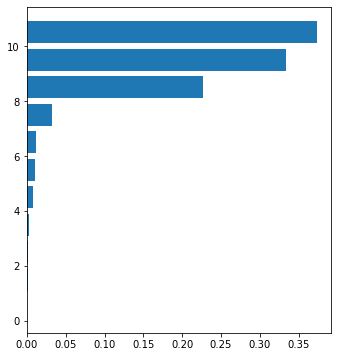

In [24]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(df.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.impo

In [ ]:
import string
string.punctuation

In [ ]:
P = pd.DataFrame()
D=0

In [ ]:
models = [
        GradientBoostingRegressor(n_estimators=10000),
          RandomForestRegressor(n_estimators=500),
          LinearRegression()
         ]
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    P['model'+str(D)]=pred
    D+=1
    print('finishedtraining:',type(i).__name__)

In [ ]:
#pred=P.mean(axis=1)
metamodel=LinearRegression()
metamodel.fit(P,y_test)

In [ ]:
pred=metamodel.predict(P)

In [ ]:
mean_absolute_error(pred,y_test)

# Testing

In [ ]:
import os
os.listdir()

In [ ]:
dt=pd.read_csv('SUPCOM_Test.csv')

In [ ]:
dt=dt[dt.columns[:13]]

In [ ]:
sub = pd.read_csv('SUPCOM_SampleSubmission.csv')

In [ ]:
sub.head()

In [ ]:
dt = dt[['BCT_CODBUR','FJU_CODFJU','CTR_CESSAT','ACT_CODACT','CTR_OBLDIR','CTR_OBLACP','CTR_OBLFOP','CTR_OBLRES','CTR_OBLTFP','CTR_OBLDCO','CTR_OBLTVA']]
prediction=model.predict(dt)


In [ ]:
sub['target']=prediction

In [ ]:
sub.to_csv("sumbission_Njau_GBM.csv",index=False)